In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
from scipy.optimize import curve_fit
from scipy import stats
from mpmath import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource

In [2]:
def load(data): # Loading the data from the excel
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[13:21,1:13]) # Specification of the cells that have the values we need; raw data     
    mean = df1.mean(0)
    mean2 = list(map(lambda x: x - mean[-1], mean)) 
    del mean2[-1]
    del mean2[0:4]
    return mean2

In [3]:
gain_reps = 11; concentration = []; col = []
arr_ = np.zeros((7, gain_reps))

for j in range(7):
    initial = 10 / 2**4
    concentration_ = initial / 2**(j)
    concentration.append(concentration_)

for i in range(gain_reps):        
    a = 'C:\Clariostar\Writeup data\Clariostar data\TR 10uM Gain '
    b = '.xlsx'
    gain = 50*i + 600
    c = a + str(gain) + b  
    
    col.append(gain)
    
    data_ = load(c)
    
    for x in range(len(data_)):
        arr_[x, i] = data_[x]


df = pd.DataFrame(arr_, index = concentration, columns = col)
print(df)

              600       650       700       750       800       850   \
0.625000  1035.875  1401.500  1969.500  2852.500  4458.750  6422.125   
0.312500   565.375   755.750  1008.125  1323.250  1871.500  2720.375   
0.156250   304.750   416.250   553.250   711.750   874.875  1268.250   
0.078125   161.500   227.250   302.250   400.000   507.125   734.375   
0.039062    79.250   117.875   157.625   212.250   295.375   426.500   
0.019531    46.000    68.250    89.500   118.000   179.625   255.875   
0.009766    17.625    31.625    40.000    53.875    83.125   117.750   

              900        950        1000       1050       1100  
0.625000  9107.375  12647.125  17415.625  23606.500  31419.125  
0.312500  3851.000   5378.625   7395.625  10026.000  13334.625  
0.156250  1799.625   2508.875   3451.125   4671.250   6222.875  
0.078125  1045.125   1455.000   2001.750   2712.750   3615.875  
0.039062   609.125    856.500   1172.500   1596.000   2126.250  
0.019531   365.000    508.875    

0.999561725504633
0.9993718411284683
0.9992029933103165
0.9993572916304423
0.9994640440838564
0.9994627891562993
0.9996154919797438


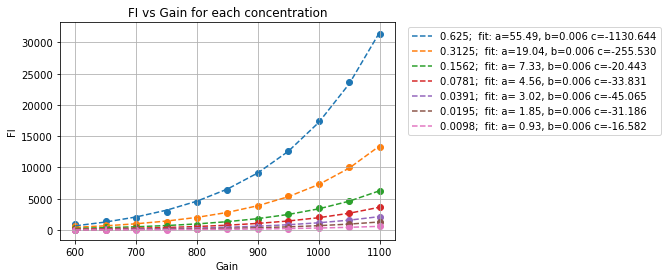

0.005979091233997454


In [4]:
def func(x, a, b, c):
    return a*np.exp(b*x) + c

popt5_alist = []
popt5_blist = []
popt5_clist = []

for i in range(df.shape[0]):
    x1 = df.columns
    y1 = df.iloc[i, :]

    plt.scatter(x1, y1)
    
    
    popt5, pcov5 = curve_fit(func, x1, y1, p0 = [1, 0.006, -50], maxfev = 30000)
#     print(np.round(popt1, 3))
    popt5_alist.append(popt5[0])
    popt5_blist.append(popt5[1])
    popt5_clist.append(popt5[2])
   

    plt.plot(x1, func(x1, *popt5), '--', label = str(round(initial*0.5**i, 4)) + ';  fit: a=%5.2f, b=%5.3f c=%5.3f'% tuple(popt5))

    residuals = y1 - func(x1, *popt5)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y1 - np.mean(y1))**2)
    r_squared = 1 - (ss_res/ss_tot)

    print(r_squared)    

plt.title("FI vs Gain for each concentration")
plt.xlabel('Gain')
plt.ylabel('FI')

plt.grid()
plt.legend(bbox_to_anchor = (1.025, 1), loc = 2)
plt.show()

bmean = np.mean(popt5_blist)
print(bmean)

[[ 0.00701604  2.73195858]
 [ 0.00648159  2.39773304]
 [ 0.00608854  2.02549787]
 [ 0.00626162  1.311835  ]
 [ 0.00661892  0.42603108]
 [ 0.00672691 -0.1944854 ]
 [ 0.00688913 -1.12789593]] 
 (7, 2)


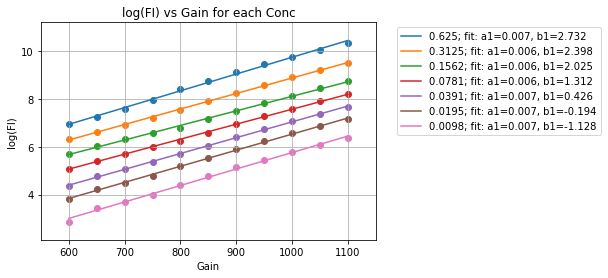

In [5]:
fit_array = np.zeros((0, 2))

for i in range(df.shape[0]):
    x1 = (np.array(df.columns))
    y1 = np.log(np.array(df.iloc[i,:]))
    
    fit1 = np.polyfit(x1, y1, 1)
    fit1_list = [fit1]
    a1 = fit1[0]
    b1 = fit1[1]
    fit_equation = a1 * x1 + b1
    
    fit_array = np.append(fit_array, fit1_list, axis = 0)
    
    plt.scatter(x1, y1)
    plt.plot(x1, fit_equation, label = str(round(initial * 0.5**i, 4)) + '; fit: a1=%5.3f, b1=%5.3f' % tuple(fit1))

print(fit_array, "\n", fit_array.shape)

plt.title("log(FI) vs Gain for each Conc"); plt.xlabel("Gain"); plt.ylabel("log(FI)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2); plt.grid(); plt.margins(0.10) 
plt.show()

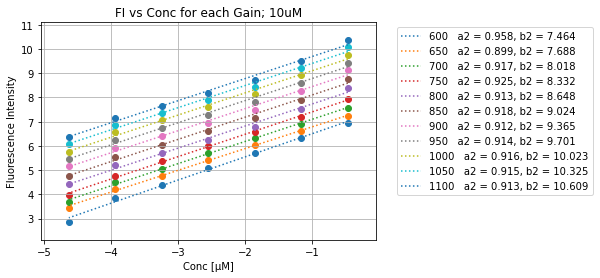

0.9181317092528325


In [6]:
fit2_array = np.zeros((0,2)); a2_list = []; b2_list = []
for i in range(df.shape[1]): 
    x2 = np.log(df.index)
    y2 = np.log(np.array(df.iloc[:, i]))   
    
    fit2 = np.polyfit(x2, y2, 1) # linear regression, generates y=mx+c as log(FI)=(B)Gain+log(a)
    a2 = fit2[0]
    b2 = fit2[1]
    fit2_equation = a2 * x2 + b2
    fit2_list = [fit2]
    
    fit2_array = np.append(fit2_array, fit2_list, axis = 0)
    a2_list.append(a2); b2_list.append(b2)
    
    plt.scatter(x2, y2)
    plt.plot(x2, fit2_equation, ':', label = str(50*i + 600) + '   a2 = %5.3f, b2 = %5.3f' % tuple(fit2))
    
    
plt.title('FI vs Conc for each Gain; 10uM'); plt.xlabel('Conc [µM]'); plt.ylabel('Fluorescence Intensity')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2); plt.grid(); plt.margins(0.10) 
plt.show()
# print(fit2_array)

a2_array = np.array(a2_list)
a2_mean = np.mean(a2_array)
print(a2_mean)

59.52883618672818 0.005955531114453203 -820.6997623473289

 0.9993872011099922


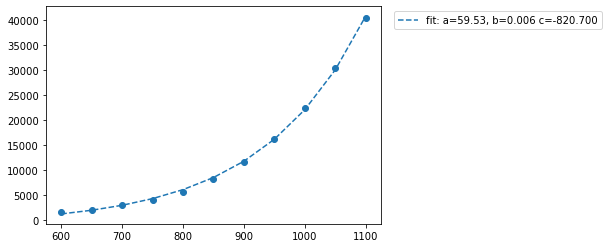

In [7]:
def func(x, a, b, c):
    return a*np.exp(b*x) + c



m = df.columns
delta = np.exp(b2_list)
    
popt9, pcov9 = curve_fit(func, m, delta, p0 = [1, 0.006, -50], maxfev = 30000)

plt.plot(m, func(m, *popt9), '--', label = 'fit: a=%5.2f, b=%5.3f c=%5.3f'% tuple(popt9))
plt.scatter(m, delta)

print(*popt9)
plt.legend(bbox_to_anchor=(1.025, 1))
    

residuals_test1_1 = delta - func(m, *popt9)
ss_res1_1 = np.sum(residuals_test1_1**2)
ss_tot1_1 = np.sum((delta - np.mean(delta))**2)
r_squared1_1 = 1 - (ss_res1_1 / ss_tot1_1)
print('\n', r_squared1_1)

                600          650          700          750          800   \
0.625000  844.756112  1322.666171  1966.344499  2833.289611  4000.944003   
0.312500  447.039767   699.946847  1040.577481  1499.359531  2117.275093   
0.156250  236.570710   370.407590   550.667238   793.451892  1120.449028   
0.078125  125.191773   196.017431   291.409734   419.889888   592.934772   
0.039062   66.250720   103.731225   154.212249   222.203160   313.777454   
0.019531   35.059476    54.893930    81.608179   117.588553   166.049109   
0.009766   18.553260    29.049532    43.186549    62.227143    87.872173   

                 850          900           950           1000          1050  \
0.625000  5573.611938  7691.776740  10544.649893  14387.072927  19562.281911   
0.312500  2949.521344  4070.441201   5580.164222   7613.550988  10352.239926   
0.156250  1560.868653  2154.052585   2952.988773   4029.044611   5478.342045   
0.078125   826.002144  1139.911452   1562.703595   2132.145763   2899.1

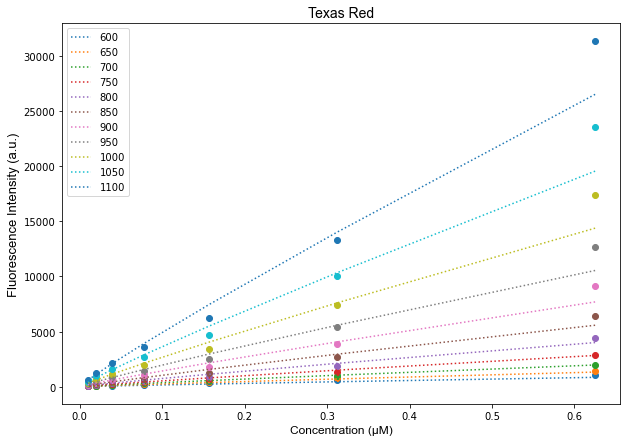

In [8]:
model = list(df.index)
model = np.array(model, dtype = float); model_array = []; index_gain = []

for gn in range(gain_reps): 
    gain = 50*gn + 600
    result = list(map(lambda uM: (popt9[0]*np.exp(popt9[1]*gain)+popt9[2])*uM**(a2_mean), model))
    model_array.append(result)
    index_gain.append(gain)


model_df = pd.DataFrame(model_array, index = index_gain, columns = model)
model_df = model_df.T # transpose df
print(model_df)

plt.figure(figsize=(10,7))

for i in range(df.shape[1]):
    gain = 50*i + 600
  
    x = df.index
    y = df.iloc[:, i]
    
    x_model = model_df.index
    y_model = model_df.iloc[:, i]
    
    plt.scatter(x, y)
    plt.plot(x_model, y_model, ':', label = '%2.0f' % gain)

plt.title('Texas Red', fontsize=14, fontname='Arial'); plt.xlabel('Concentration (\u03BCM)', fontsize=12, fontname='Arial'); plt.ylabel('Fluorescence Intensity (a.u.)', fontsize=13, fontname='Arial')
plt.grid(False); plt.legend(loc="upper left") 
params = {'legend.fontsize': 11, 'legend.handlelength': 2}; plt.rcParams["font.family"] = "Arial"; plt.rcParams.update(params)
plt.savefig('Claristar TR.png', dpi=300)

plt.show()

## plt.title('log(FI) vs log(Conc) for each Gain'); plt.xlabel('log(Conc)'); plt.ylabel('log(Fluorescence Intensity)')
## plt.legend(bbox_to_anchor = (1.025, 1)); plt.grid(False)

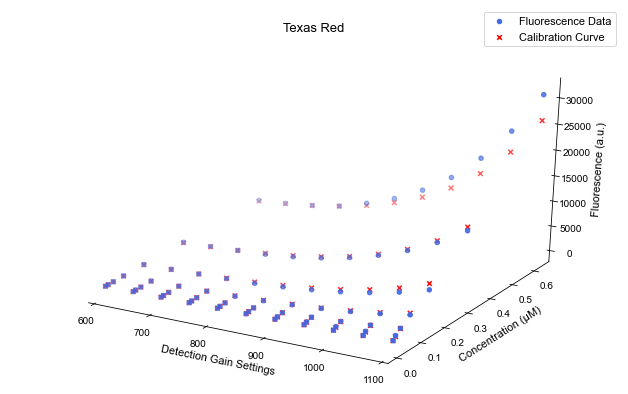

In [25]:
fig = plt.figure(figsize=(11,7))
ax = plt.axes(projection='3d')
x,y = np.meshgrid(df.columns, df.index)
X,Y = np.meshgrid(model_df.columns, model_df.index)
z1 = np.array(df.values)
z2 = np.array(model_df.values)


ax.scatter3D(x, y, z1, label = 'Fluorescence Data', s=20, c='royalblue', marker='o')
ax.scatter3D(X, Y, z2, label = 'Calibration Curve', s=22, c='r', marker='x')

ax.set_title('Texas Red', fontname="Arial", fontsize=13)
ax.set_xlabel('Detection Gain Settings', fontname="Arial", fontsize=11)
ax.set_ylabel('Concentration (\u03BCM)', fontname="Arial", fontsize=11)
ax.set_zlabel('Fluorescence (a.u.)', fontname="Arial", fontsize=11)
ax.legend(loc=1)

# plt.rc('grid', linestyle=":", color='grey'); #ax.set_xticklabels(df.columns, fontsize=9.5); 
ax.grid(False)
ax.set_xlim(600,1100)

ax.xaxis.pane.fill = False; ax.yaxis.pane.fill = False; ax.zaxis.pane.fill = False
# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w'); ax.yaxis.pane.set_edgecolor('w'); ax.zaxis.pane.set_edgecolor('w')

# plt.savefig('Claristar TR 3D.png', dpi=300)

plt.show()

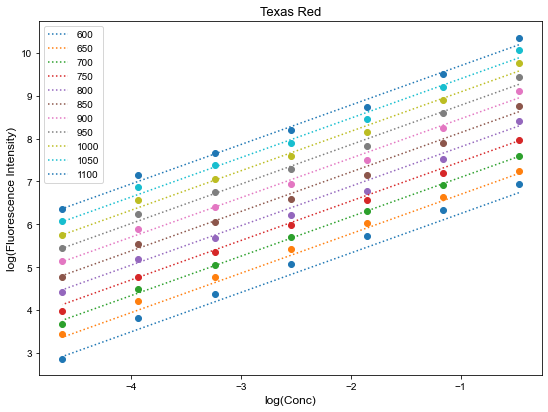

In [84]:
plt.figure(figsize=(9,6.5))

for i in range(df.shape[1]): 
    x2 = df.index
    y2 = np.array(df.iloc[:, i])   
    
    x2_model = model_df.index
    y2_model = model_df.iloc[:, i]
    
    plt.scatter(np.log(x2), np.log(y2)) 
    plt.plot(np.log(x2_model), np.log(y2_model), ':', label = str(50*i + 600))


plt.title('Texas Red', fontsize=13, fontname='Arial'); 
plt.xlabel('log(Conc)', fontsize=12, fontname='Arial'); plt.ylabel('log(Fluorescence Intensity)', fontsize=12, fontname='Arial')
# plt.legend(bbox_to_anchor = (1.05, 1), loc = 2); plt.grid(False); #plt.margins(0.10) 
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
plt.rcParams["font.family"] = "Arial"
plt.rcParams.update(params)
plt.legend(loc="upper left") #, ncol=len(df.columns))

plt.show()